In [11]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\dr274\AppData\Local\Temp\ipykernel_27512\2782274124.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


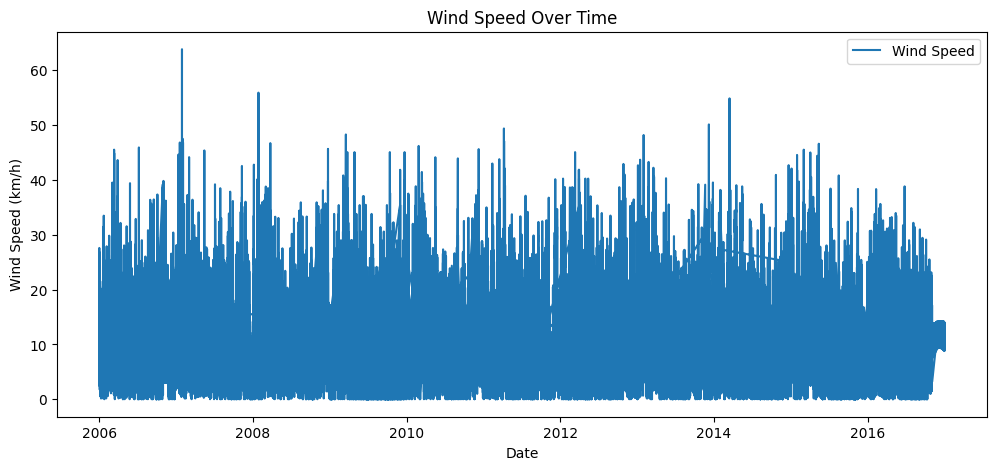

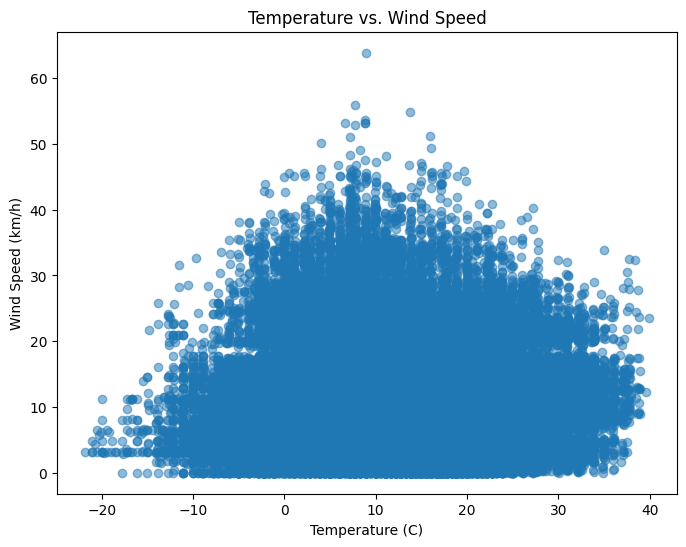

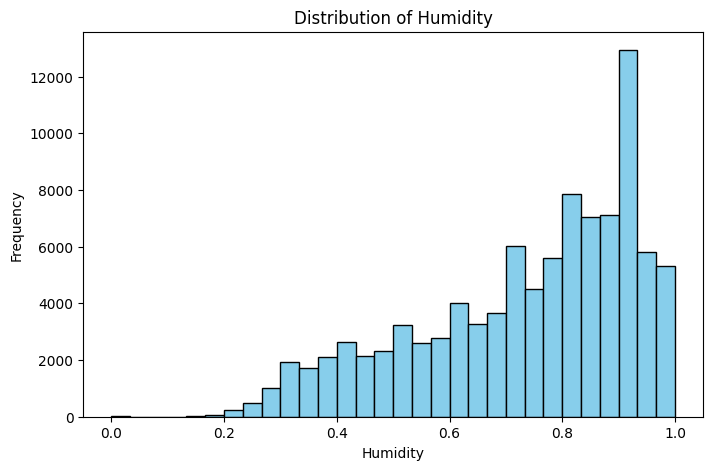

In [ ]:
df = pd.read_csv(r"C:\Users\dr274\Downloads\archive\weatherHistory.csv")


df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

#Plot Wind Speed over time
plt.figure(figsize=(12, 5))
plt.plot(df['Formatted Date'], df['Wind Speed (km/h)'], label='Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Over Time')
plt.legend()
plt.show()

#Scatter plot Temperature vs. Wind Speed
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature (C)'], df['Wind Speed (km/h)'], alpha=0.5)
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.title('Temperature vs. Wind Speed')
plt.show()

#Distribution of Humidity
plt.figure(figsize=(8, 5))
plt.hist(df['Humidity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')
plt.show()

# Select features (exclude target)
features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
            'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']
target = 'Wind Speed (km/h)'


In [13]:
X = df[features].values
y = df[target].values.reshape(-1, 1)


In [14]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Convert to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [15]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

input_dim = X.shape[1]
model = LinearRegressionModel(input_dim)


In [ ]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)
criterion = nn.MSELoss()
results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Initialize a new model for each fold
    model = LinearRegressionModel(input_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    for epoch in range(100):  
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_val)
        val_loss = criterion(val_preds, y_val).item()
        print(f'Fold {fold+1} - Validation MSE: {val_loss:.4f}')
        results.append(val_loss)

print(f'Average Validation MSE: {sum(results)/len(results):.4f}')


Fold 1 - Validation MSE: 0.8432
Fold 2 - Validation MSE: 0.8916
Fold 3 - Validation MSE: 0.8225
Fold 4 - Validation MSE: 0.8651
Fold 5 - Validation MSE: 0.8307
Fold 6 - Validation MSE: 0.8784
Fold 7 - Validation MSE: 0.8826
Fold 8 - Validation MSE: 0.8756
Fold 9 - Validation MSE: 0.8377
Fold 10 - Validation MSE: 0.8394
Fold 11 - Validation MSE: 0.8253
Fold 12 - Validation MSE: 0.8542
Fold 13 - Validation MSE: 0.8054
Fold 14 - Validation MSE: 0.8558
Fold 15 - Validation MSE: 0.9075
Average Validation MSE: 0.8543
